# import the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset

In [2]:
df=pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


# Data preparation

In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# fill missing values with mean

In [5]:
df.fillna(df.mean(),inplace=True)

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.duplicated().sum()

0

# visualize the distribution of price_range

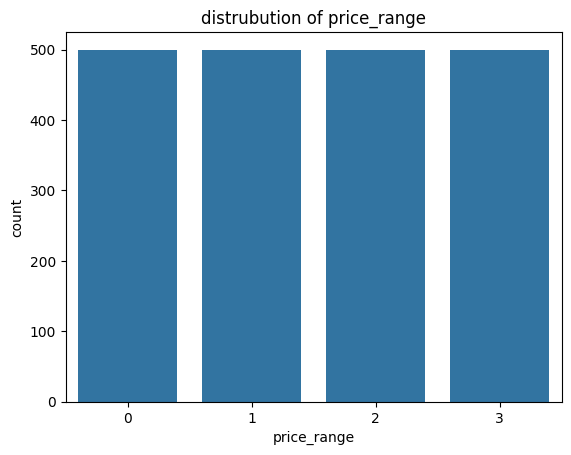

In [8]:
sns.countplot(x='price_range',data=df)
plt.title('distrubution of price_range')
plt.xlabel('price_range')
plt.ylabel('count')
plt.show()


# Model selection

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

#split data into features (X) and target (y) and splitting the data

In [11]:
x=df.drop('price_range',axis=1)
y=df['price_range']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



#Seleccting a RandomForestClassifier due to it's ability to handle complex relationship and esemble learning advantages
#Train a RandomForestClassifier


In [12]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

#evaluate model performance with confusion matrix and classififcation report

In [13]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)


[[100   5   0   0]
 [  4  81   6   0]
 [  0   7  77   8]
 [  0   0  13  99]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.87      0.89      0.88        91
           2       0.80      0.84      0.82        92
           3       0.93      0.88      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



#Calculate correlation matrix for all numerical columns and Plot the correlation matrix

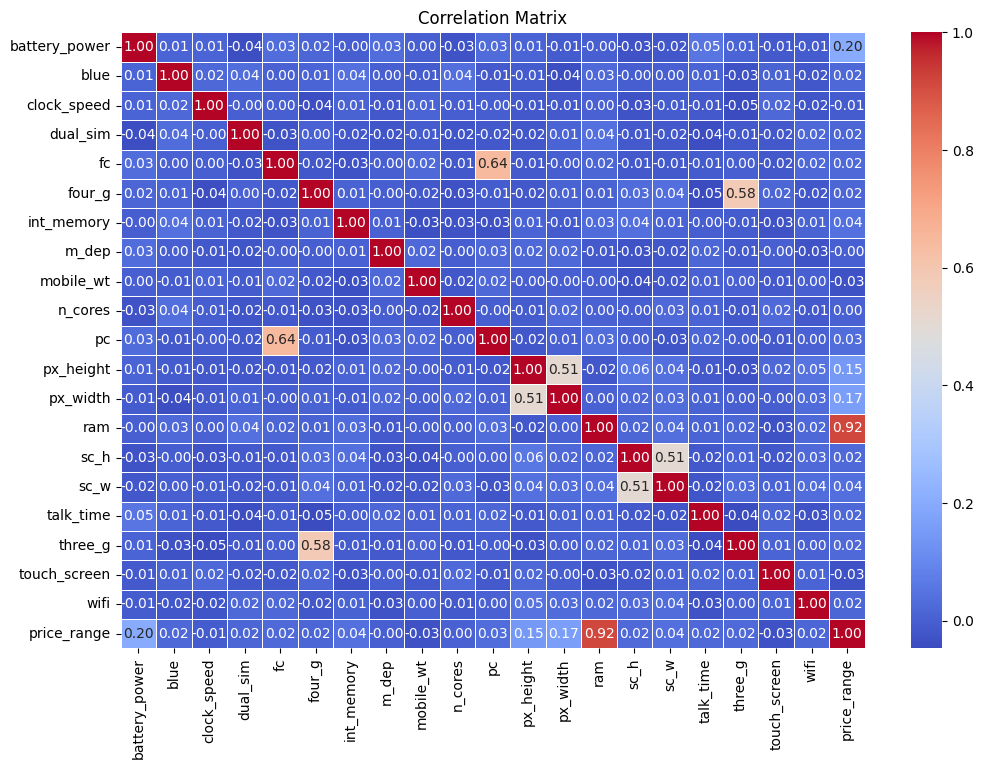

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
import joblib
model_path = '/content/random_forest_model.joblib'
joblib.dump(random_forest, model_path)

['/content/random_forest_model.joblib']

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
from google.colab import files
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from google.colab import files

uploaded = files.upload()


Saving random_forest_model (1).joblib to random_forest_model (1).joblib


# initalize my token

In [30]:
!pip install pyngrok
!pip install flask-cors


In [27]:
from pyngrok import ngrok
ngrok.set_auth_token('2jOUxr7y3JrmuDmcxWuf1ubaSmt_5FFECbbuFQJR4DwMH1awu')


# Flask implentation

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import joblib
import numpy as np
from pyngrok import ngrok

app = Flask(__name__)
CORS(app)

# Load your trained model
model = joblib.load('random_forest_model.joblib')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = [data['battery_power'], data['blue'], data['clock_speed'], data['dual_sim'],
                data['fc'], data['four_g'], data['int_memory'], data['m_dep'],
                data['mobile_wt'], data['n_cores'], data['pc'], data['px_height'],
                data['px_width'], data['ram'], data['sc_h'], data['sc_w'],
                data['talk_time'], data['three_g'], data['touch_screen'], data['wifi']]

    prediction = model.predict([features])
    return jsonify({'price_range': int(prediction[0])})

# Expose the app using ngrok
public_url = ngrok.connect(5000, "http")
print(f'Public URL: {public_url}')

# Run the Flask app
app.run(host='0.0.0.0', port=5000)



Public URL: NgrokTunnel: "https://a44f-34-82-49-176.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
